In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
from keras.models import Sequential
from keras.layers import Dense

2023-05-13 17:55:07.926756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<h1>Global Terrorism Database</h1>

Recognition of whether a terrorist attack is a case of suicide bombing based on region and year of occurence.

<h3>Data preprocessing</h3>

In [4]:
df = pd.read_csv('./terror.csv', low_memory=False) 


In [5]:
weaptypes   = df[["weaptype1_txt", "weaptype1"]].drop_duplicates()
regions     = df[["region", "region_txt"]].drop_duplicates()
countries   = df[["country", "country_txt"]].drop_duplicates()

provstates = df["provstate"].drop_duplicates()
# print(f"Weapon types:\n\n{weaptypes}\n\nRegions:\n\n{regions}\n\nCountries:\n\n{countries}")

In [6]:
# Map provstate index codes to corresponding string names
# to replace the string names in preprocessing

provstate_map = {}

for index in range(len(provstates.values)):
    name = provstates.values[index]
    provstate_map[name] = index

# 0 is nan value, will be filtered out

In [7]:
# Filter out irrelevant columns
cols_to_keep = ["iyear", "country", "region", "provstate", "suicide", "weaptype1"]
preprocessed = df[cols_to_keep]

# Filter out attacks with "Unknown" weapon type
preprocessed = preprocessed[df["weaptype1"] != 13]

# Filter out nan provstate values and replace them with int codes
preprocessed["provstate"] = preprocessed["provstate"].map(provstate_map)
preprocessed = preprocessed[df["provstate"] != 0]

# Add column is_sb
def is_sb(row):
    if row['suicide'] == 1 and row['weaptype1'] == 6:
        return 1
    else:
        return 0

preprocessed["is_sb"] = preprocessed.apply(lambda row: is_sb(row), axis=1)

# len(preprocessed[preprocessed["is_sb"] == 1])

preprocessed

/tmp/ipykernel_16598/2824720494.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  preprocessed = preprocessed[df["provstate"] != 0]


,iyear,country,region,provstate,suicide,weaptype1,is_sb
3,1970,78,8,3,0,6,0
4,1970,101,4,4,0,8,0
5,1970,217,1,5,0,5,0
6,1970,218,3,6,0,5,0
7,1970,217,1,7,0,6,0
...,...,...,...,...,...,...,...
181686,2017,182,11,1356,0,5,0
181687,2017,200,10,2578,0,6,0
181688,2017,160,5,401,0,8,0
181689,2017,92,6,496,0,6,0


In [8]:
# rename variable for better readability
data = preprocessed

In [9]:
target_column = ['is_sb'] 

predictors = list(set(list(data.columns)) - set(target_column))

data[predictors] = data[predictors] / data[predictors].max()
data.describe()

,iyear,country,region,provstate,suicide,weaptype1,is_sb
count,166534.000000,166534.000000,166534.000000,166534.000000,166534.000000,166534.000000,166534.000000
mean,0.992916,0.132481,0.596720,0.241739,0.039818,0.487578,0.039559
std,0.006541,0.112472,0.243223,0.226577,0.195531,0.078622,0.194922
min,0.976698,0.003984,0.083333,0.000000,0.000000,0.083333,0.000000
25%,0.987110,0.082669,0.416667,0.070427,0.000000,0.416667,0.000000
50%,0.996034,0.097610,0.583333,0.169587,0.000000,0.500000,0.000000
75%,0.998513,0.159363,0.833333,0.331114,0.000000,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:

X = data[predictors].values
Y = data[target_column].values

Y
np.unique(Y)

array([0, 1])

In [31]:
cwt = { 
    0: 1, 
    1: 2 
}

In [43]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=6))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model.fit(X, Y, batch_size=35, epochs=20)

# Compile the model
model.compile(optimizer='adam', 
              loss="binary_crossentropy", 
              metrics=['accuracy'])

history = model.fit(X, Y, validation_split = 0.3, epochs=50, batch_size=150)

Epoch 1/50
778/778 [==============================] - 3s 4ms/step - loss: 0.2777 - accuracy: 0.9784 - val_loss: 0.0194 - val_accuracy: 0.9997
Epoch 2/50
778/778 [==============================] - 2s 3ms/step - loss: 0.0097 - accuracy: 0.9997 - val_loss: 0.0043 - val_accuracy: 0.9997
Epoch 3/50
778/778 [==============================] - 3s 3ms/step - loss: 0.0033 - accuracy: 0.9997 - val_loss: 0.0029 - val_accuracy: 0.9997
Epoch 4/50
778/778 [==============================] - 3s 4ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 0.0024 - val_accuracy: 0.9997
Epoch 5/50
778/778 [==============================] - 2s 3ms/step - loss: 0.0018 - accuracy: 0.9997 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 6/50
778/778 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 7/50
778/778 [==============================] - 2s 3ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0017 - val_accuracy: 0.9997
Epoch 

In [36]:
pred_test= model.predict(X)
scores2 = model.evaluate(X, Y, verbose=0)

print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))
# confusion_matrix(Y.argmax(axis=1), pred_test.argmax(axis=1))

5205/5205 [==============================] - 5s 1ms/step
Accuracy on test data: 0.9997958540916443% 
 Error on test data: 0.0002041459083557129


array([[166534]])

In [40]:
# Load the trained model (assuming Gaussian Naive Bayes)
model = GaussianNB()
model.fit(X, Y.ravel())

# Apply the model to test data
y_pred = model.predict(X)

# Evaluate the model's performance
accuracy = accuracy_score(Y.ravel(), y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


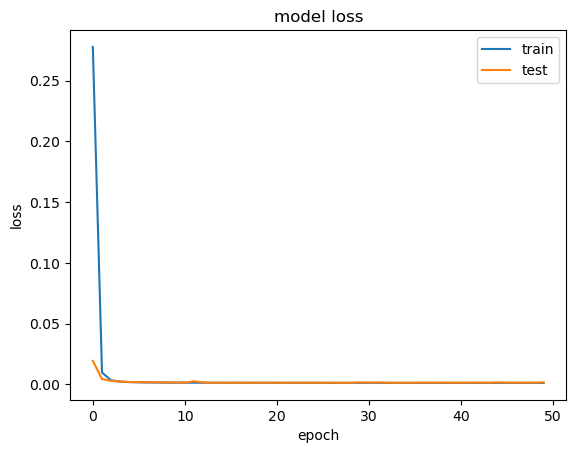

In [47]:
plot_data = history.take()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right')

plt.show()